<a href="https://colab.research.google.com/github/Kamraaan1/BDA/blob/main/Datasets_towardsdatascience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pd
import numpy as np

dataset = load_diabetes (as_frame = True)

X,y = dataset['data'],dataset['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

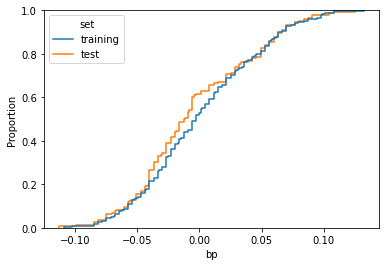

In [19]:
feature_name = 'bp'

df = pd.DataFrame({
    feature_name:np.concatenate((X_train.loc[:,feature_name], X_test.loc[:,feature_name])), 
    'set':['training']*X_train.shape[0] + ['test']*X_test.shape[0]
})

sns.ecdfplot(data = df, x = feature_name, hue='set')

In [26]:
from scipy.stats import ks_2samp
import numpy as np

ks_2samp (X_train.loc[:,feature_name], X_test.loc[:,feature_name]).statistic

0.11972417623102555

In [28]:
distances = list(map(lambda i : 
                     ks_2samp (X_train.iloc[:,i], X_test.iloc[:,i]).statistic, range(X_train.shape[1])))

for i in range (X_train.shape[1]):
  print(X_train.columns[i], distances[i])

age 0.05715475749722325
sex 0.054979637171417996
bmi 0.08015549796371714
bp 0.11972417623102555
s1 0.07284339133654202
s2 0.08908737504627916
s3 0.07936875231395779
s4 0.06613291373565346
s5 0.05858941132913736
s6 0.09667715660866345


In [30]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296 entries, 93 to 172
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     296 non-null    float64
 1   sex     296 non-null    float64
 2   bmi     296 non-null    float64
 3   bp      296 non-null    float64
 4   s1      296 non-null    float64
 5   s2      296 non-null    float64
 6   s3      296 non-null    float64
 7   s4      296 non-null    float64
 8   s5      296 non-null    float64
 9   s6      296 non-null    float64
dtypes: float64(10)
memory usage: 25.4 KB


In [1]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
r2_score (y_test, lr.predict(X_test))


NameError: ignored